<a href="https://colab.research.google.com/github/hvr2026/Autogluon/blob/main/image%20classifier/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autogluon.multimodal
!pip install torchaudio==2.3.1


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from autogluon.multimodal.utils.misc import shopee_dataset
download_dir = './ag_automm_tutorial_imgcls'
train_data_path, test_data_path = shopee_dataset(download_dir)
print(train_data_path)

100%|██████████| 84.0M/84.0M [00:17<00:00, 4.77MiB/s]


                                                 image  label
0    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
1    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
2    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
3    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
4    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
..                                                 ...    ...
795  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
796  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
797  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
798  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
799  /content/ag_automm_tutorial_imgcls/shopee/trai...      3

[800 rows x 2 columns]


We can see there are 800 rows and 2 columns in this training dataframe. The 2 columns are **image** and **label**, and the **image** column contains the absolute paths of the images. Each row represents a different training sample.

In addition to image paths, `MultiModalPredictor` also supports image bytearrays during training and inference. We can load the dataset with bytearrays with the option `is_bytearray` set to `True`:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

download_dir = './ag_automm_tutorial_imgcls'
train_data_byte, test_data_byte = shopee_dataset(download_dir, is_bytearray=True)

In [ ]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_shopee"
predictor = MultiModalPredictor(label="label", path=model_path)
predictor.fit(
    train_data=train_data_path,
    time_limit=300, # seconds
)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       12.1
Memory Avail:       7.91 GB / 12.67 GB (62.4%)
Disk Space Avail:   203.94 GB / 235.68 GB (86.5%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [0, 1, 2, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 2: 'val_accuracy' reached 0.22500 (best 0.22500), saving model to '/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/epoch=0-step=2.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 5: 'val_accuracy' reached 0.81875 (best 0.81875), saving model to '/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/epoch=0-step=5.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 7: 'val_accuracy' reached 0.91250 (best 0.91250), saving model to '/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/epoch=1-step=7.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 10: 'val_accuracy' reached 0.97500 (best 0.97500), saving model to '/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/epoch=1-step=10.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 12: 'val_accuracy' reached 0.97500 (best 0.97500), saving model to '/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/epoch=2-step=12.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 15: 'val_accuracy' reached 0.97500 (best 0.97500), saving model to '/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/epoch=2-step=15.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 17: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 20: 'val_accuracy' reached 0.98125 (best 0.98125), saving model to '/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/epoch=3-step=20.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:05:04. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 1.000


You can also evaluate on test data with image bytearray using the model trained on training data with image path, and vice versa:

In [ ]:
scores = predictor.evaluate(test_data_byte, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 1.000


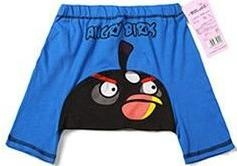

In [ ]:
image_path = test_data_path.iloc[0]['image']
from IPython.display import Image, display
pil_img = Image(filename=image_path)
display(pil_img)

We can easily use the final model to `predict` the label,

In [ ]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

Predicting: |          | 0/? [00:00<?, ?it/s]

[0]


If probabilities of all categories are needed, you can call `predict_proba`:

In [ ]:
proba = predictor.predict_proba({'image': [image_path]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[[9.994431e-01 3.944732e-04 8.610595e-05 7.628564e-05]]


Similarly as `predictor.evaluate`, we can also parse image_bytearrays into `.predict` and `.predict_proba`:

In [ ]:
image_byte = test_data_byte.iloc[0]['image']
predictions = predictor.predict({'image': [image_byte]})
print(predictions)

proba = predictor.predict_proba({'image': [image_byte]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[0]


Predicting: |          | 0/? [00:00<?, ?it/s]

[[9.994431e-01 3.944732e-04 8.610595e-05 7.628564e-05]]


In [ ]:
feature = predictor.extract_embedding({'image': [image_path]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


You should expect the same result when extract embedding from image bytearray:

In [ ]:
feature = predictor.extract_embedding({'image': [image_byte]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


In [ ]:
loaded_predictor = MultiModalPredictor.load(model_path)
load_proba = loaded_predictor.predict_proba({'image': [image_path]})
print(load_proba)

Load pretrained checkpoint: /content/tmp/d6908e26e38740228f1ab313150ffbcf-automm_shopee/model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

[[9.994431e-01 3.944732e-04 8.610595e-05 7.628564e-05]]
